### Import the necessary library's.

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1. Load the dataset and assign it to a variable.

In [217]:
data=pd.read_csv(r"C:\Users\Gandharvi\OneDrive\Documents\imarticus projects\Python Programming-Project\Dataset\train.csv")

### Q2. Display first 5 rows (.head())

In [218]:
data.head(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


### Q3. Check shape, column names, data types and describe.

In [219]:
data.shape

(3198, 19)

### *The dataset has 3198 rows and 19 columns.*

In [220]:
data.head(0)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18


In [221]:
data.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
Unnamed: 17              float64
Unnamed: 18               object
dtype: object

In [222]:
data.describe()

,subscriber,Trend_day_count,Unnamed: 17
count,3.175000e+03,3197.000000,1.0
mean,3.823981e+06,7.964342,2544.0
std,2.865771e+07,78.556055,NaN
min,0.000000e+00,0.000000,2544.0
25%,2.428800e+05,4.000000,2544.0
50%,1.241220e+06,7.000000,2544.0
75%,3.812622e+06,10.000000,2544.0
max,1.576229e+09,4444.000000,2544.0


### Q4. Are there any missing or duplicate values?

In [223]:
data.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [224]:
data.duplicated().sum()

np.int64(0)

### Q5. Identify invalid numeric values (FALSE, #VALUE!, etc.)

In [225]:
invalid_views = data[pd.to_numeric(data['views'], errors='coerce').isna() & data['views'].notna()]
print(invalid_views[['views']])

        views
2421  #VALUE!


In [226]:
invalid_likes= data[pd.to_numeric(data['likes'], errors='coerce').isna() & data['likes'].notna()]
print(invalid_likes[['likes']])

     likes
1234      


In [227]:
invalid_dislike = data[pd.to_numeric(data['dislike'], errors='coerce').isna() & data['dislike'].notna()]
print(invalid_dislike[['dislike']])

     dislike
1234   FALSE


In [228]:
invalid_comment = data[pd.to_numeric(data['comment_count'], errors='coerce').isna() & data['comment_count'].notna()]
print(invalid_comment[['comment_count']])

     comment_count
0                 
6                 
14                
15                
16                
...            ...
3190              
3191              
3193              
3194              
3195              

[1015 rows x 1 columns]


### Q6. Convert columns (views, likes, dislike, comment_count) to numeric

In [229]:
data['views'] = pd.to_numeric(data['views'], errors='coerce')
print(data['views'].isna().sum())  # Count NaN (invalid) entries
print(data['views'].dtypes)        # Should now be float64 or int64

1
float64


In [230]:
data['likes'] = pd.to_numeric(data['likes'], errors='coerce')
print(data['likes'].isna().sum())  # Count NaN (invalid) entries
print(data['likes'].dtypes)   

1
float64


In [231]:
data['dislike'] = pd.to_numeric(data['dislike'], errors='coerce')
print(data['dislike'].isna().sum())  # Count NaN (invalid) entries
print(data['dislike'].dtypes)

1
float64


In [232]:
data['comment_count'] = pd.to_numeric(data['comment_count'], errors='coerce')
print(data['comment_count'].isna().sum())  # Count NaN (invalid) entries
print(data['comment_count'].dtypes)        # Should now be float64 or int64

1015
float64


### Q7.What is the average, minimum, and maximum number of views, likes, dislikes, and comments?

In [233]:
avg=data[['views', 'likes', 'dislike', 'comment_count']].mean().round()
avg

views            1572121.0
likes               9766.0
dislike             5785.0
comment_count     164789.0
dtype: float64

In [234]:
maxi=data[['views', 'likes', 'dislike', 'comment_count']].max()
maxi

views            989873537.0
likes              1213628.0
dislike              14858.0
comment_count       299877.0
dtype: float64

In [235]:
mini=data[['views', 'likes', 'dislike', 'comment_count']].min()
mini

views             1.0
likes             0.0
dislike           0.0
comment_count    10.0
dtype: float64

### Q8. Which channels have the highest average subscriber count?

In [236]:
hig_sub = data.groupby('channel_title')['subscriber'].mean().reset_index()
hig_sub = hig_sub.sort_values(by='subscriber', ascending=False).head(5)
print(hig_sub)

                               channel_title    subscriber
1213  The Tonight Show Starring Jimmy Fallon  6.305851e+07
1134                                     TMZ  5.778600e+07
142                                   Boldly  3.173016e+07
369                               Ed Sheeran  2.867694e+07
354                             Dude Perfect  2.799838e+07


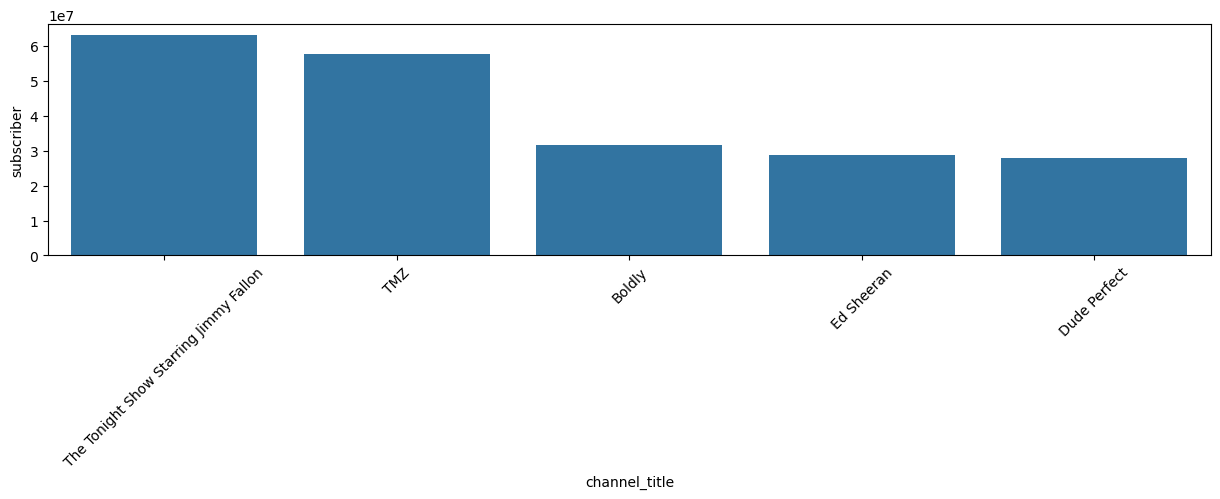

In [237]:
plt.figure(figsize=(15,3))
sns.barplot(x='channel_title',y='subscriber',data=hig_sub)
plt.xticks(rotation=45);

### Q9. Which channels have the most trending videos (Trend_day_count)?

In [238]:
tren_vid=data.groupby('channel_title')['Trend_day_count'].mean().reset_index()
tren_vid=tren_vid.sort_values(by='Trend_day_count',ascending =False).head(10)
print(tren_vid)

                       channel_title  Trend_day_count
185                 CBS This Morning            562.0
1496                          yovo68             12.0
1477               slaymeclarkson c:             12.0
1487               toofacedcosmetics             12.0
13             A Chick Called Albert             12.0
458   Genuine Survival Research Labs             12.0
476             Graham The Christian             12.0
1387                      cgriesemer             12.0
1392                      colinfurze             12.0
1396                        daronjay             12.0


### Q10. What are the top 10 most frequent categories (Category_id)?

In [239]:
top10=data['category_id'].value_counts().head(10)
top10

category_id
24    786
10    415
26    303
25    294
23    283
22    246
17    204
28    186
1     163
27    117
Name: count, dtype: int64

### Q11. Which videos have the highest number of views, likes, and comments?

In [240]:
vid=data.groupby('Video_id')[['views','likes','comment_count']].sum().reset_index()
vid=vid.sort_values(by=['views','likes','comment_count'],ascending=False)
print(vid)

        Video_id        views    likes  comment_count
3172   ZUW72GLK1  989873537.0      0.0       273491.0
45    AJB53GU]16  598795075.0   7559.0       190283.0
1485  LWN89WY^61  100360000.0  10406.0            0.0
901   HKB85DYN73   30039119.0      0.0        78629.0
2343  STW13QWV33    6433327.0  13021.0       290217.0
...          ...          ...      ...            ...
983   HZM70JDN22          7.0   9409.0       290807.0
3008   YOK2XY_45          6.0   7897.0            0.0
2691   VTY19LAZ4          2.0   7227.0            0.0
3098   ZFN3PTC98          1.0   6253.0       130065.0
2808  WWW33ANN88          0.0   3690.0            0.0

[3198 rows x 4 columns]


### Q12. Is there any correlation between subscriber count and video views?

In [241]:
correlation=data['subscriber'].corr(data['views']).round()
print("Correlation between Subscribers and Views:",correlation)

Correlation between Subscribers and Views: 0.0


### Q13. Which channels have the highest total number of views across all their trending videos?

In [242]:
chann=data.groupby('channel_title')['views'].sum().reset_index()
chann=chann.sort_values('views',ascending=False).head(10)
print(chann)

                               channel_title        views
411                           FaeryInLoveInc  989873537.0
1235                      TheReportOfTheWeek  600205312.0
1228                            TheEllenShow  149927957.0
1187      The Late Show with Stephen Colbert  127872317.0
1213  The Tonight Show Starring Jimmy Fallon  121558942.0
1334                                     WWE   89637184.0
600                        Jimmy Kimmel Live   74015738.0
844                                      NBA   50129165.0
1186    The Late Late Show with James Corden   48792576.0
264                             CollegeHumor   43625940.0


### Q14. Identify the outliers in the number of views using the Z-score method.

In [243]:
m = data['views'].mean()
s = data['views'].std()

z = (data['views'] - m) / s
z

out = data[ abs (z) > 3]
out

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
29,ZUW72GLK1,1,FaeryInLoveInc,44.0,Nick Andopolis: Drummer,freaks and geeks|jason segel|judd apatow|drums...,"The opening of Freaks and Geeks Episode 6, I'm...",12.0,21,1,273491.0,TRUE,TRUE,0.0,0.0,True,989873537.0,NaN,NaN
1476,LWN89WY^61,24,The Late Show with Stephen Colbert,3965373.0,Tom Hanks And Stephen Argue Christmas Tree Tec...,The Late Show|Stephen Colbert|Colbert|Late Sho...,'The Post' star Tom Hanks and Stephen debate t...,10.0,14,6,NaN,FALSE,FALSE,10406.0,3064.0,False,100360000.0,NaN,NaN
2379,AJB53GU]16,24,TheReportOfTheWeek,770330.0,Checking Out the New McDonald’s Dollar Menu,reviewbrah|mcdonalds|burger|sandwich|dollar me...,Trying out the new Dollar Menu from McDonald's...,1.0,9,3,190283.0,TRUE,FALSE,7559.0,1871.0,True,598795075.0,NaN,NaN
